In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
# Read data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
metadata = pd.read_csv('metadata.csv')

In [37]:
# Drop id column from metadata
metadata.drop('ID', axis=1, inplace=True)
metadata.drop('UpsellDate', axis=1, inplace=True)

# Drop ID column from train and test
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

# Merge metadata with train and test
train = pd.concat([train, metadata], axis=1)
test = pd.concat([test, metadata], axis=1)

In [38]:
test.shape, train.shape

((37343, 20), (37343, 26))

In [39]:
# I need my train and test to have 56016 rows so we will have to create dummy rows
# for the test set and fill them with random values
import random
random.seed(42) # Set seed for reproducibility
train = pd.concat([train, pd.DataFrame(np.random.randn(18673, 26), columns=train.columns)], ignore_index=True)
test = pd.concat([test, pd.DataFrame(np.random.randn(18673, 20), columns=test.columns)], ignore_index=True)
train.shape, test.shape


((56016, 26), (56016, 20))

In [40]:
train['TransactionDates'].fillna(train['TransactionDates'].mode()[0], inplace=True)
train['PaymentsHistory'].fillna(train['PaymentsHistory'].mode()[0], inplace=True)

test['TransactionDates'].fillna(test['TransactionDates'].mode()[0], inplace=True)
test['PaymentsHistory'].fillna(test['PaymentsHistory'].mode()[0], inplace=True)

# For m1 to m6
train['m1'].fillna(train['m1'].mode()[0], inplace=True) 
train['m2'].fillna(train['m2'].mode()[0], inplace=True)
train['m3'].fillna(train['m3'].mode()[0], inplace=True)
train['m4'].fillna(train['m4'].mode()[0], inplace=True)
train['m5'].fillna(train['m5'].mode()[0], inplace=True)
train['m6'].fillna(train['m6'].mode()[0], inplace=True)


# Imputing age and religion
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Region'].fillna(train['Region'].mode()[0], inplace=True)

test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Region'].fillna(test['Region'].mode()[0], inplace=True)

train.isnull().any().sum()

0

In [41]:
# Change gender column name
train.rename(columns={'MainApplicantGender': 'Gender'}, inplace=True)

# ExpectedTermDate	FirstPaymentDate	LastPaymentDate
# Convert to datetime

# ExpectedTermDate
train['ExpectedTermDate'] = pd.to_datetime(train['ExpectedTermDate'], errors='coerce')
test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'], errors='coerce')

# FirstPaymentDate
train['FirstPaymentDate'] = pd.to_datetime(train['FirstPaymentDate'], errors='coerce')
test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'], errors='coerce')

# LastPaymentDate
train['LastPaymentDate'] = pd.to_datetime(train['LastPaymentDate'], errors='coerce')
test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'], errors='coerce')

# Extract month, day and year
# ExpectedTermDate
train['ExpectedTermDate_year'] = train['ExpectedTermDate'].dt.year
train['ExpectedTermDate_month'] = train['ExpectedTermDate'].dt.month
train['ExpectedTermDate_day'] = train['ExpectedTermDate'].dt.day

 # FirstPaymentDate
train['FirstPaymentDate_year'] = train['FirstPaymentDate'].dt.year
train['FirstPaymentDate_month'] = train['FirstPaymentDate'].dt.month
train['FirstPaymentDate_day'] = train['FirstPaymentDate'].dt.day

# LastPaymentDate
train['LastPaymentDate_year'] = train['LastPaymentDate'].dt.year
train['LastPaymentDate_month'] = train['LastPaymentDate'].dt.month
train['LastPaymentDate_day'] = train['LastPaymentDate'].dt.day

# m1 to m6 our targets are the next six payments which we will predict
train['Target'] = train['m1'] + train['m2'] + train['m3'] + train['m4'] + train['m5'] + train['m6']


In [22]:
train['Target'] = np.log1p(train['Target'])

# Convert age to number instead of float
train['Age'] = train['Age'].astype(int)

In [23]:
# Extract month, day and year
# ExpectedTermDate
# Convert it to datetime
#test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'])

# Extract month, day and year
test['ExpectedTermDate_month'] = test['ExpectedTermDate'].dt.month
test['ExpectedTermDate_day'] = test['ExpectedTermDate'].dt.day
test['ExpectedTermDate_year'] = test['ExpectedTermDate'].dt.year

# FirstPaymentDate
# Convert it to datetime
#test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'])

# Extract month, day and year
test['FirstPaymentDate_month'] = test['FirstPaymentDate'].dt.month
test['FirstPaymentDate_day'] = test['FirstPaymentDate'].dt.day
test['FirstPaymentDate_year'] = test['FirstPaymentDate'].dt.year

# LastPaymentDate
# Convert it to datetime
#test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'])

# Extract month, day and year
test['LastPaymentDate_month'] = test['LastPaymentDate'].dt.month
test['LastPaymentDate_day'] = test['LastPaymentDate'].dt.day
test['LastPaymentDate_year'] = test['LastPaymentDate'].dt.year

# Renam gender column
test.rename(columns={'MainApplicantGender':'Gender'}, inplace=True)

In [24]:
# Drop date columns
#train.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)
#test.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)

# Drop initial target columns
train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'm6'], axis=1, inplace=True)

In [25]:
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
Term                      0.887669
Deposit                   0.886504
TotalContractValue        0.780653
Age                       0.774046
DaysOnDeposit             0.569796
FirstPaymentDate_month    0.431848
RatePerUnit               0.373688
AccessoryRate             0.089334
LastPaymentDate_month     0.086781
ExpectedTermDate_day      0.060466
FirstPaymentDate_day      0.032026
LastPaymentDate_day      -0.013064
ExpectedTermDate_month   -0.257381
LastPaymentDate_year     -0.346339
ExpectedTermDate_year    -0.649905
FirstPaymentDate_year    -0.734541
Name: Target, dtype: float64

In [28]:
# Get those over .5 correlation
corr = train.select_dtypes('number').corr()
high_corr = corr[corr['Target'] > .5]

# Get the features for modelling
features = high_corr.index.tolist()
features.remove('Target')
features

['Deposit',
 'RatePerUnit',
 'Age',
 'Term',
 'TotalContractValue',
 'FirstPaymentDate_month']

In [26]:
# We can increase the correlation between target and other features by taking the log of the features
# Log transform
train['Age'] = np.log(train['Age'])
train['Deposit'] = np.log(train['Deposit'])
train['ExpectedTermDate_year'] = np.log(train['ExpectedTermDate_year'])
train['FirstPaymentDate_year'] = np.log(train['FirstPaymentDate_year'])
train['FirstPaymentDate_month'] = np.log(train['FirstPaymentDate_month'])
train['FirstPaymentDate_day'] = np.log(train['FirstPaymentDate_day'])
train['LastPaymentDate_year'] = np.log(train['LastPaymentDate_year'])
train['LastPaymentDate_month'] = np.log(train['LastPaymentDate_month'])
train['RatePerUnit'] = np.log(train['RatePerUnit'])
train['TotalContractValue'] = np.log(train['TotalContractValue'])
train['Target'] = np.log(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
TotalContractValue        0.899397
Deposit                   0.890432
RatePerUnit               0.864044
Term                      0.807940
Age                       0.790091
FirstPaymentDate_month    0.534444
DaysOnDeposit             0.497060
LastPaymentDate_month     0.099737
AccessoryRate             0.070601
ExpectedTermDate_day      0.061901
FirstPaymentDate_day      0.022006
LastPaymentDate_day      -0.013600
ExpectedTermDate_month   -0.265487
LastPaymentDate_year     -0.356976
ExpectedTermDate_year    -0.669948
FirstPaymentDate_year    -0.757374
Name: Target, dtype: float64

In [27]:
# We can also increase correlation by taking the square root of the features
# Square root transform
train['Age'] = np.sqrt(train['Age'])
train['Deposit'] = np.sqrt(train['Deposit'])
train['Term'] = np.sqrt(train['Term'])
train['ExpectedTermDate_year'] = np.sqrt(train['ExpectedTermDate_year'])
train['FirstPaymentDate_year'] = np.sqrt(train['FirstPaymentDate_year'])
train['Target'] = np.sqrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
TotalContractValue        0.934700
RatePerUnit               0.889806
Term                      0.869075
Deposit                   0.851365
Age                       0.805503
FirstPaymentDate_month    0.538302
DaysOnDeposit             0.432976
LastPaymentDate_month     0.100553
ExpectedTermDate_day      0.062243
AccessoryRate             0.060758
FirstPaymentDate_day      0.022179
LastPaymentDate_day      -0.013743
ExpectedTermDate_month   -0.267442
LastPaymentDate_year     -0.359561
ExpectedTermDate_year    -0.674809
FirstPaymentDate_year    -0.762909
Name: Target, dtype: float64

In [ ]:
# We can also go ahead and increase correlation by taking the cube root of the features
# Cube root transform
train['Age'] = np.cbrt(train['Age'])
train['Deposit'] = np.cbrt(train['Deposit'])
train['Term'] = np.cbrt(train['Term'])
train['Target'] = np.cbrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# We can also increase correlation by taking the exponential of the features
# Exponential transform
train['Age'] = np.exp(train['Age'])
train['Deposit'] = np.exp(train['Deposit'])
train['Term'] = np.exp(train['Term'])
train['Target'] = np.exp(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# Another way is by taking the square of the features
# Square transform
train['Age'] = np.square(train['Age'])
train['Deposit'] = np.square(train['Deposit'])
train['Term'] = np.square(train['Term'])
train['Target'] = np.square(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# Inverse square
# Inverse square transform
train['Age'] = 1/(train['Age']**2)
train['Deposit'] = 1/(train['Deposit']**2)
train['Term'] = 1/(train['Term']**2)
train['Target'] = 1/(train['Target']**2)

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [29]:
train['Target'].isna().sum()

14079

The predicted values are: [1.4376023  1.31318756 1.42120467 ... 1.30583875 1.33964259 1.40153554]
The r2 score is : 0.27183649409179633
The mean absolute error is : 0.11654600203232048
The mean squared error is : 0.044292153041215074
The root mean squared error is : 0.21045700995978983


Text(0.5, 1.0, 'Actual vs Predicted values')

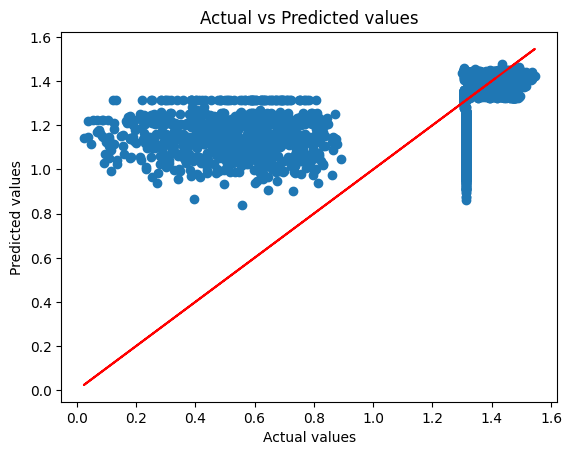

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Fill missing values in target variable
train['Target'].fillna(train['Target'].mean(), inplace=True)

# Define X and y
X = train[features]
y = train['Target']

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)

print(f'The predicted values are: {lr_y_pred}')

# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print(f'The r2 score is : {r2_score(y_test, lr_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, lr_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, lr_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, lr_y_pred))}')


# Visualize the model
plt.scatter(y_test, lr_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


In [57]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,ID,Target
0,ID_6L67PAA x m1,0.0
1,ID_6L67PAA x m2,0.0
2,ID_6L67PAA x m3,0.0
3,ID_6L67PAA x m4,0.0
4,ID_6L67PAA x m5,0.0


In [58]:
# Make predictions on the test set
test = test[features]
test = scaler.transform(test)
test_pred = lr.predict(test)
test_pred

array([7.81950064, 7.68349984, 7.583296  , ..., 2.5982452 , 2.12603782,
       2.56113885])

In [60]:
# Create a dataframe
sub = pd.DataFrame({'ID': sample['ID'], 'Target': test_pred})
sub.shape

(56016, 2)

In [61]:
sub.to_csv('LinearRegression.csv', index=False)

The predicted values are: [ 7.22968433  2.69312796  8.03324695 ...  5.8486342   5.71794202
 13.05433673]
The r2 score is : 0.6807893310782862
The mean absolute error is : 1.3359536288110876
The mean squared error is : 3.0254399330385033
The root mean squared error is : 1.7393791803509961


Text(0.5, 1.0, 'Actual vs Predicted values')

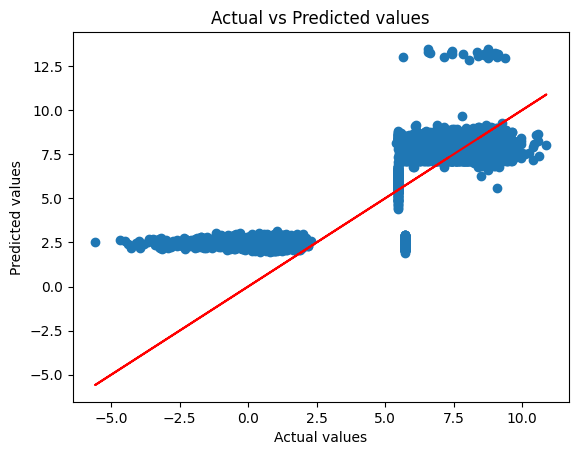

In [62]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso.predict(X_test)
print(f'The predicted values are: {lasso_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, lasso_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, lasso_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, lasso_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}')

# Visualize the model
plt.scatter(y_test, lasso_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


The predicted values are: [8.11888511 1.88618867 8.09120932 ... 5.48479693 5.48479693 8.63869456]
The r2 score is : 0.46810589736188224
The mean absolute error is : 1.344850817791137
The mean squared error is : 5.041227674829692
The root mean squared error is : 2.2452678403321267


Text(0.5, 1.0, 'Actual vs Predicted values')

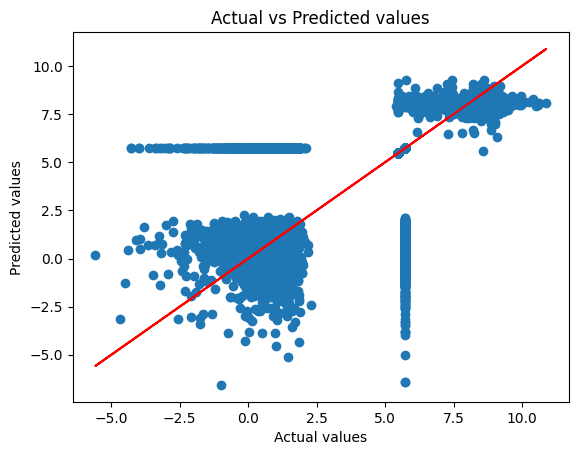

In [63]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt.predict(X_test)
print(f'The predicted values are: {dt_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, dt_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, dt_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, dt_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, dt_y_pred))}')

# Visualize the model
plt.scatter(y_test, dt_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

The predicted values are: [ 7.52703148  2.56036897  8.04167235 ...  5.84117876  5.40257933
 12.3936004 ]
The r2 score is : 0.6879418041627917
The mean absolute error is : 1.2919008092520958
The mean squared error is : 2.9576496622341364
The root mean squared error is : 1.719781864724168


Text(0.5, 1.0, 'Actual vs Predicted values')

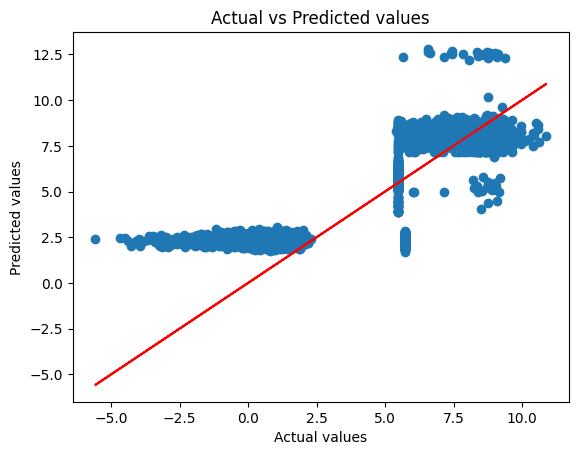

In [64]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge.predict(X_test)
print(f'The predicted values are: {ridge_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, ridge_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, ridge_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, ridge_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, ridge_y_pred))}')

# Visualize the model
plt.scatter(y_test, ridge_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

The predicted values are: [8.11260624 3.40646818 8.09018174 ... 5.48479693 5.48479693 8.59928013]
The r2 score is : 0.6981041337151831
The mean absolute error is : 1.1851911282748748
The mean squared error is : 2.8613323375521023
The root mean squared error is : 1.691547320518141


Text(0.5, 1.0, 'Actual vs Predicted values')

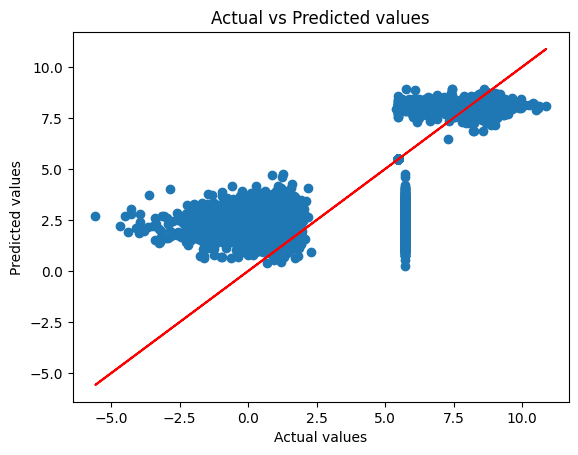

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)
print(f'The predicted values are: {rf_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, rf_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, rf_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, rf_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, rf_y_pred))}')

# Visualize the model
plt.scatter(y_test, rf_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

The predicted values are: [8.13452  4.00499  8.091613 ... 5.49875  5.49875  8.112413]
The r2 score is : 0.6946244619116857
The mean absolute error is : 1.1864755833846339
The mean squared error is : 2.8943122440938573
The root mean squared error is : 1.701267834320586


Text(0.5, 1.0, 'Actual vs Predicted values')

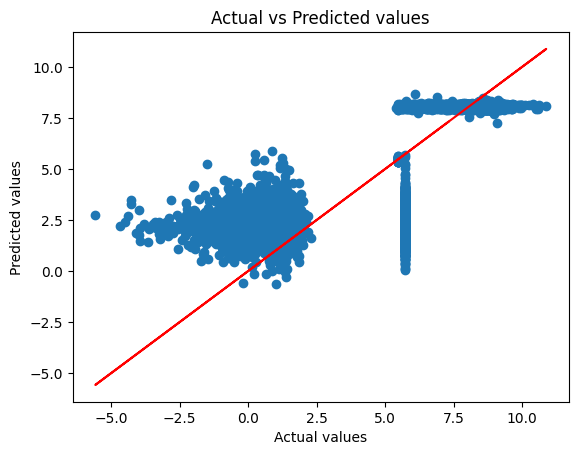

In [66]:
# XGboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb.predict(X_test)
print(f'The predicted values are: {xgb_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, xgb_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, xgb_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, xgb_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}')

# Visualize the model
plt.scatter(y_test, xgb_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

Epoch 1/100
1401/1401 [==============================] - 24s 10ms/step - loss: 4.1358 - val_loss: 2.8684
Epoch 2/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.9587 - val_loss: 2.8043
Epoch 3/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.9167 - val_loss: 2.8026
Epoch 4/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.8968 - val_loss: 2.7920
Epoch 5/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.8798 - val_loss: 2.8046
Epoch 6/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.8668 - val_loss: 2.8656
Epoch 7/100
1401/1401 [==============================] - 12s 9ms/step - loss: 2.8524 - val_loss: 2.7916
Epoch 8/100
1401/1401 [==============================] - 15s 11ms/step - loss: 2.8486 - val_loss: 2.8214
Epoch 9/100
1401/1401 [==============================] - 14s 10ms/step - loss: 2.8425 - val_loss: 2.7839
Epoch 10/100
1401/1401 [==============================] 

Text(0.5, 1.0, 'Actual vs Predicted values')

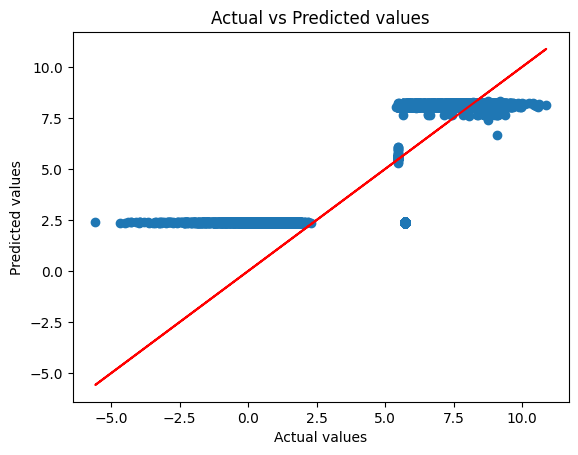

In [68]:
# neural network
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Create a model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Create an early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions
nn_y_pred = model.predict(X_test)
print(f'The predicted values are: {nn_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, nn_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, nn_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, nn_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, nn_y_pred))}')

# Visualize the model
plt.scatter(y_test, nn_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [72]:
# Predicting with the nn model
preds = model.predict(test)
print(f'The predicted values are: {preds}')

# Flatten the predictions
preds_flat = preds.flatten()

# Create a dataframe
sub_nn = pd.DataFrame({"ID": sample["ID"], "Target": preds_flat})


1751/1751 [==============================] - 12s 7ms/step
The predicted values are: [[8.211647 ]
 [8.206126 ]
 [8.15852  ]
 ...
 [2.3710725]
 [2.387924 ]
 [2.374108 ]]


In [73]:
sub_nn.to_csv('neural_net.csv', index=False)

## Explaination on linear regression
* Linear regression analysis is the most widely used of all statistical techniques: it is the study of linear, additive relationships between variables.   Let Y denote the “dependent” variable whose values you wish to predict, and let X1, …,Xk denote the “independent” variables from which you wish to predict it, with the value of variable Xi in period t (or in row t of the data set) denoted by Xit.  
* Then the equation for computing the predicted value of Yt is:  Yt = β0 + β1X1t + … + βkXk.
* The coefficients β0, …,βk are called the regression coefficients.
* The regression coefficients are estimated using the method of least squares.  The least squares estimates minimize the sum of the squared residuals, where the residual is the difference between the observed value of Y and the predicted value of Y.  The least squares estimates are computed by finding the values of β0, …,βk that minimize the sum of the squared residuals.  The least squares estimates are unbiased, meaning that their expected value is equal to the true value of the regression coefficients.  The least squares estimates are also consistent, meaning that they converge to the true value of the regression coefficients as the sample size increases.
*